# How to calculate Tone-to-noise Ratio and Prominence Ratio from .wav file 
(ECMA 74)

MoSQITo is a unified and modular development framework of key sound quality metrics favoring reproducible science and efficient shared scripting among engineers, teachers and researchers community.

This tutorial explains how to calculate the tone-to-noise ratio and prominence-ratio (ECMA 74) of a steady signal from a .wav file.

In [1]:
# Add MoSQITo to the Python path
import sys
sys.path.append('..')

# Import useful packages
import math
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt

# Import MoSQITo modules
from mosqito.functions.shared.load import load
from mosqito.functions.shared.conversion import amp2db
from mosqito.functions.tonality_tnr_pr.comp_tnr import comp_tnr
from mosqito.functions.tonality_tnr_pr.comp_pr import comp_pr


For this tutorial, the test signal .wav file has been generated adding a sin tone at 442Hz to a white noise at 80 dB.

The signal is loaded using the "load" function which takes 3 parameters:

- The signal type as a boolean: True since the signal is stationary
- The path to the .wav signal file: 
- A calibration factor for the signal to be in Pa: 1

Signal resampled to 48 kHz to allow calculation.


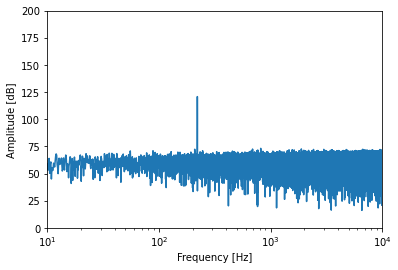

In [5]:
# Load signal and compute third-octave spectrum
signal, fs = load(True,r"C:\Users\pc\Documents\Salomé\MoSQITo_tonality\mosqito\validations\tonality_tnr_pr\white_noise_tone_at_442_Hz.wav", calib=0.1) 
n = len(signal)

# Plot the signal spectrum
freqs = np.linspace(0, fs/2, n)
spectrum = amp2db(abs(fft(signal * np.blackman(n))) , ref=0.00002)
plt.plot(freqs, spectrum)
plt.xscale('log')
plt.xlim(10,10000)
plt.ylim(0,200)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [dB]")
plt.show()

The spectrum obviously shows a high-level tonal component.

to study this tonal component, the functions "comp_tnr" and "comp_pr" are then used with 5 parameters:

- The signal type (stationary / non-stationary),
- The signal values
- The sampling frequency,
- The prominence criteria (if True the algorithm only returns the prominent values according to ECMA 74)
- The plot criteria (if True plot the results)

The scripts calculates the ratios in dB and returns both the total and individuaal values (with specification of the tonal frequency). There is no need to enter the frequency of the potential tonal components, the algorithm automatically detects them.

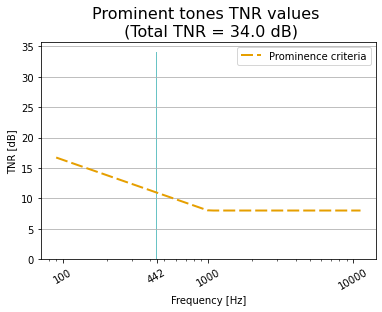

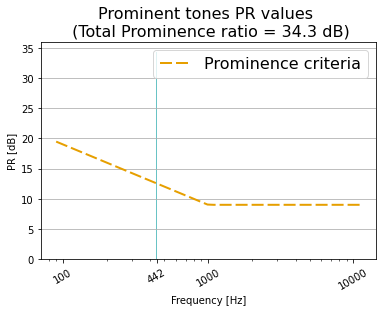

In [6]:
# Tone-to-noise Ratio calculation
tnr = comp_tnr(True, signal, fs, prominence=True, plot=True)
# Prominence Ratio calculation
pr = comp_pr(True, signal, fs, prominence=True, plot=True)
